In [3]:
# importing libraries

import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob

# to mount a drive
from google.colab import drive

In [4]:
#Mounting the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/ML_Lab1/ML_Lab10/Kaggle"
%cd /content/drive/My Drive/ML_Lab1/ML_Lab10/Kaggle
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

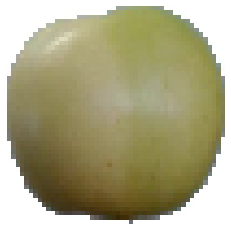

(50, 50, 3)


In [18]:
#Setting Training & Test dir paths
train_path = './fruits-360-original-size/Training/'
test_path = './fruits-360-original-size/Test/'

#Displaying the image
img = load_img(train_path + "apple_6/r0_18.jpg", target_size=(50, 50))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)


In [19]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)

#Finding top 5 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(4)
print("Top 5 frequent Fruits:")
frequent_fruits

Top 5 frequent Fruits:


[('apple_hit_1', 468),
 ('pear_1', 326),
 ('apple_braeburn_1', 320),
 ('apple_granny_smith_1', 320)]

In [20]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

24


In [21]:
'''
There is a MaxPooling2D layer after every convolutional layer.
This layer downsamples the input representation by taking the maximum value over a window.
‘Pooling’ is basically the process of merging for the purpose of reducing the size of the data.
'''

#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)         

In [22]:
#Specifing epochs & batch size
epochs = 50
batch_size = 64

In [23]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

# test generator
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [24]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 20s 779ms/step - loss: 2.7638 - accuracy: 0.1527 - val_loss: 2.0748 - val_accuracy: 0.2773
Epoch 2/50
25/25 [==============================] - 19s 771ms/step - loss: 2.0470 - accuracy: 0.2854 - val_loss: 1.5653 - val_accuracy: 0.5404
Epoch 3/50
25/25 [==============================] - 20s 786ms/step - loss: 1.7552 - accuracy: 0.3775 - val_loss: 1.4681 - val_accuracy: 0.4583
Epoch 4/50
25/25 [==============================] - 19s 782ms/step - loss: 1.4807 - accuracy: 0.4775 - val_loss: 1.2210 - val_accuracy: 0.5182
Epoch 5/50
25/25 [==============================] - 20s 799ms/step - loss: 1.3012 - accuracy: 0.5331 - val_loss: 1.0504 - val_accuracy: 0.6289
Epoch 6/50
25/25 [==============================] - 20s 819ms/step - loss: 1.1573 - accuracy: 0.5731 - val_loss: 0.8189 - val_accuracy: 0.7214
Epoch 7/50
25/25 [==============================] - 20s 795ms/step - loss: 0.9233 - accuracy: 0.6619 - val_loss: 0.5257 - val_accuracy: 0.8620

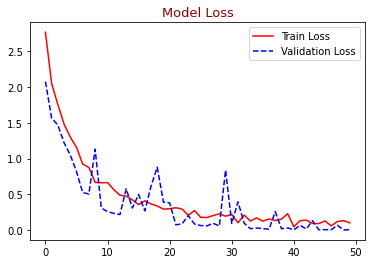

In [28]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "red")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed",markeredgecolor = "blue", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

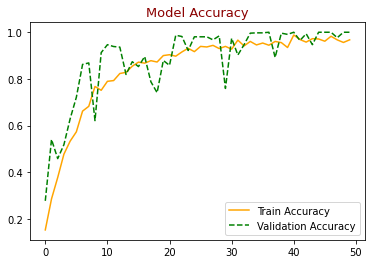

In [29]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "orange")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "green", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()